### Preliminary Analysis

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')

#### ABS Power Stats Exporation

In [ ]:
# Load ABSPOWER STATS Batch extracted from the Neo4J database
cp_lm_df= pd.read_csv('./analytics/CP-LM-Abs.csv') 

In [63]:
print(cp_lm_df.head(5))

   Subject      Brain_Region Channel Wavelength  AbsPower  Alignment Marker
0  sub-001  Anterior Frontal     AF7      ALPHA  2.622656          1     CP
1  sub-001  Anterior Frontal     AF7       BETA  3.668762          1     CP
2  sub-001  Anterior Frontal     AF7      DELTA  5.196897          1     CP
3  sub-001  Anterior Frontal     AF7      GAMMA  0.041884          1     CP
4  sub-001  Anterior Frontal     AF7      THETA  0.521945          1     CP


In [65]:
cp_lm_df.duplicated().sum()


np.int64(0)

In [66]:
cp_lm_df.shape
cp_lm_df.info
cp_lm_df.isnull().sum()

Subject         0
Brain_Region    0
Channel         0
Wavelength      0
AbsPower        0
Alignment       0
Marker          0
dtype: int64

array([[<Axes: title={'center': 'AbsPower'}>,
        <Axes: title={'center': 'Alignment'}>]], dtype=object)

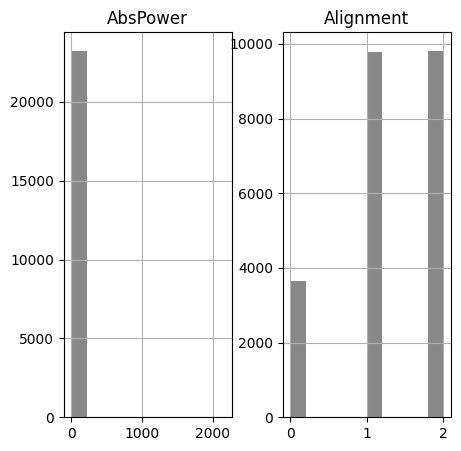

In [67]:
cp_lm_df.hist(figsize = (5,5), color="#888888")

In [69]:
pivotfull = pd.pivot_table(cp_lm_df,index=['Marker','Brain_Region', 'Alignment'],columns=['Wavelength'],values=['AbsPower'], aggfunc={'AbsPower': ["mean"]})
pivotfull

AbsPower                                  \
                                         mean                                   
Wavelength                              ALPHA       BETA      DELTA     GAMMA   
Marker Brain_Region      Alignment                                              
CP     Anterior Frontal  1           7.364713   1.706322   2.241025  0.142801   
                         2           9.833495   1.919273   2.258430  0.129021   
       Central           0           3.320914   1.762784   2.214686  0.057606   
                         1           7.432944   1.778231   2.241167  0.099667   
                         2          28.929286   5.101281   4.346078  0.431126   
       Centro-Parietal   1           4.776879   1.778165   2.079102  0.090598   
                         2          34.412553  10.975689  11.631469  1.206805   
       Frontal Polar     0           5.748238   1.961045   2.661636  0.088003   
                         1          10.101595   2.754936   2.712748  0.239321   
                         2           6.705882   1.857536   2.283912  0.143860   
       Fronto-Central    1           4.960526   1.540779   1.975475  0.134099   
                         2           7.164784   1.991949   2.106224  0.176405   
       Occipital         0           8.784795   4.679195   6.312653  0.161697   
                         1           9.380654   3.675055   8.483426  0.195250   
                         2           6.898436   3.532020   8.468437  0.143089   
       Parietal          0           5.311771   2.438818   6.303878  0.098253   
                         1           5.354038   2.674989   3.739581  0.122818   
                         2           6.364171   3.062980   4.849005  0.119119   
       Parieto-Occipital 1           7.423426   3.916085   7.577714  0.145794   
                         2           6.843089   3.553055   9.455152  0.146316   
       Temporal          1           9.537453   2.321951   2.634205  0.203560   
                         2           6.413391   1.830287   1.997751  0.174101   
LM     Anterior Frontal  1           3.733192   2.543419   2.250854  0.026546   
                         2           3.785059   2.497665   2.228339  0.030369   
       Central           0           0.609723   0.562555   0.993326  0.003813   
                         1           1.711811   1.764582   3.476101  0.013783   
                         2           1.865777   1.782250   3.796973  0.014813   
       Centro-Parietal   1           3.927937   3.839750   8.132519  0.024207   
                         2           4.309095   4.157828  10.773971  0.023207   
       Frontal Polar     0           0.548301   0.430038   0.336263  0.003417   
                         1           2.935042   2.059087   1.788941  0.020049   
                         2           2.919753   2.067557   1.810698  0.021798   
       Fronto-Central    1           2.737491   2.162407   2.341882  0.021944   
                         2           2.801138   2.189737   2.444602  0.020926   
       Occipital         0           6.885057   5.997892  30.941514  0.037841   
                         1           7.615354   6.839322  36.369803  0.040424   
                         2           7.401456   6.505015  36.393902  0.043469   
       Parietal          0           3.690678   3.359919  13.137613  0.017461   
                         1           5.400510   5.231876  16.659843  0.027733   
                         2           6.088173   5.614149  21.564929  0.028999   
       Parieto-Occipital 1           7.853747   7.440341  32.132351  0.038778   
                         2           8.415281   7.392667  40.958800  0.044852   
       Temporal          1           4.910414   4.110905   5.409925  0.027464   
                         2           5.162380   4.470038   6.484365  0.031571   

                                              
                                              
Wavelength                             THETA  
Marker 

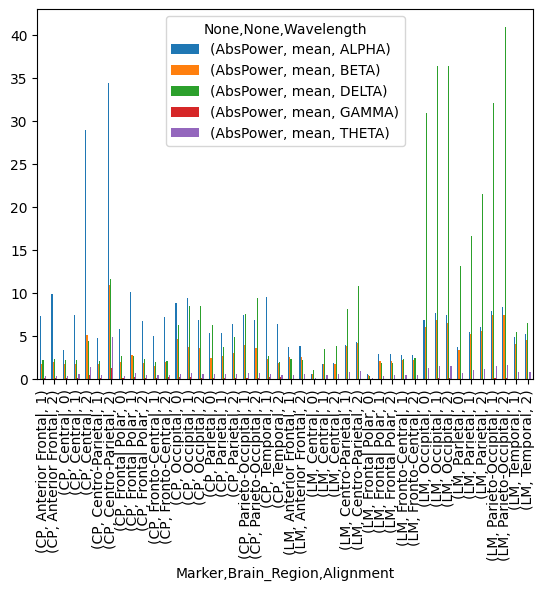

In [70]:
pivotfull.plot(kind='bar');

In [71]:
pivotsimple = pd.pivot_table(cp_lm_df,index=['Marker','Brain_Region'],columns=['Wavelength'],values=['AbsPower'], aggfunc={'AbsPower': ["mean", "std"]})
pivotsimple

AbsPower                                           \
                               mean                                            
Wavelength                    ALPHA      BETA      DELTA     GAMMA     THETA   
Marker Brain_Region                                                            
CP     Anterior Frontal    8.599104  1.812798   2.249728  0.135911  0.375397   
       Central            13.227715  2.880765   2.933977  0.196133  0.739014   
       Centro-Parietal    19.594716  6.376927   6.855285  0.648701  2.659027   
       Frontal Polar       7.739863  2.219938   2.539156  0.165694  0.496191   
       Fronto-Central      6.062655  1.766364   2.040849  0.155252  0.430516   
       Occipital           8.354628  3.962090   7.754838  0.166679  0.625165   
       Parietal            5.749638  2.782951   4.696210  0.116425  0.583241   
       Parieto-Occipital   7.133257  3.734570   8.516433  0.146055  0.725239   
       Temporal            7.975422  2.076119   2.315978  0.188830  0.507336   
LM     Anterior Frontal    3.759267  2.520417   2.239535  0.028468  0.495823   
       Central             1.408586  1.383217   2.784241  0.010918  0.375739   
       Centro-Parietal     4.115357  3.996153   9.431355  0.023715  0.874122   
       Frontal Polar       2.588005  1.830399   1.591158  0.018433  0.354748   
       Fronto-Central      2.768781  2.175843   2.392381  0.021444  0.461767   
       Occipital           7.298325  6.444549  34.555257  0.040579  1.389596   
       Parietal            5.333463  5.009911  17.920171  0.026182  1.036773   
       Parieto-Occipital   8.136048  7.416374  36.569692  0.041831  1.567448   
       Temporal            5.038099  4.292898   5.954405  0.029545  0.779013   

                                                                      \
                                 std                                   
Wavelength                     ALPHA       BETA      DELTA     GAMMA   
Marker Brain_Region                                                    
CP     Anterior Frontal    13.665581   2.302059   2.139176  0.210746   
       Central             88.713433  11.266476   8.110944  1.220433   
       Centro-Parietal    177.507088  55.085143  56.135575  6.771323   
       Frontal Polar       40.593610   9.087308   4.169844  1.165010   
       Fronto-Central       9.707745   2.148119   1.826918  0.186639   
       Occipital           15.242030  11.136878  10.138957  0.292577   
       Parietal             7.331219   6.755280   5.330719  0.131502   
       Parieto-Occipital    7.285526   7.914593  11.225422  0.222474   
       Temporal            10.334159   2.831065   3.359253  0.181917   
LM     Anterior Frontal     3.541543   2.687554   1.791363  0.032923   
       Central              1.383013   1.836526   3.771825  0.010707   
       Centro-Parietal      3.568236   4.679396  11.534593  0.020889   
       Frontal Polar        3.039068   2.362083   1.733583  0.021818   
       Fronto-Central       2.038340   2.165412   2.126377  0.028535   
       Occipital            6.626934   7.088022  54.630102  0.036296   
       Parietal             5.257969   6.300573  25.717287  0.024057   
       Parieto-Occipital    7.800705   8.833036  54.644488  0.035490   
       Temporal             4.250181   4.683407   5.522212  0.029457   

                                     
                                     
Wavelength                    THETA  
Marker Brain_Region                  
CP     Anterior Frontal    0.399384  
       Central             2.957519  
       Centro-Parietal    26.936871  
       Frontal Polar       2.572309  
       Fronto-Central      0.389989  
       Occipital           0.599663  
       Parietal            0.556254  
       Parieto-Occipital   0.760695  
       Temporal            0.505554  
LM     Anterior Frontal    0.405403  
       Central             0.433824  
       Centro-Parietal     0.726008  
       Frontal Polar       0.336851  
       Fronto-Central      0.370940

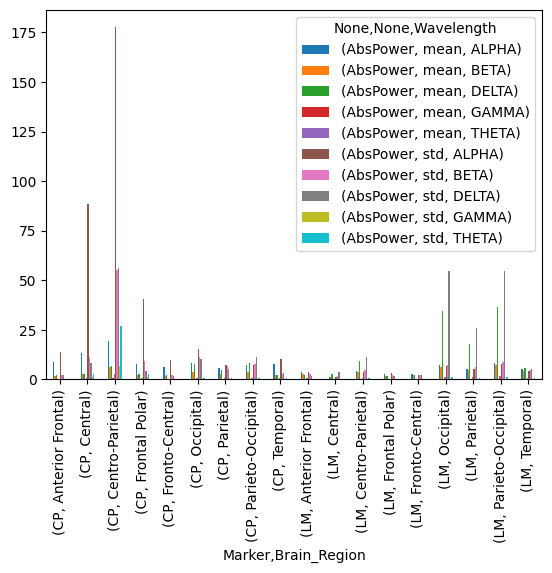

In [72]:
pivotsimple.plot(kind='bar');

#### Band ABP Variations Per Region

##### Create Pivots per Band

In [ ]:
alpha_pivot= cp_lm_df[(cp_lm_df.Wavelength == "ALPHA")].pivot_table(index=['Marker','Brain_Region'],columns=['Wavelength'],values=['AbsPower'], aggfunc={'AbsPower': ["mean", "std", "median"]})
alpha_pivot.columns = alpha_pivot.columns.rename('Feature', level=0)
alpha_pivot.columns = alpha_pivot.columns.rename('Aggr', level=1)
alpha_pivot

Feature                    AbsPower                      
Aggr                           mean    median         std
Wavelength                    ALPHA     ALPHA       ALPHA
Marker Brain_Region                                      
CP     Anterior Frontal    8.599104  4.396961   13.665581
       Central            13.227715  3.696207   88.713433
       Centro-Parietal    19.594716  3.499828  177.507088
       Frontal Polar       7.739863  3.818177   40.593610
       Fronto-Central      6.062655  3.680252    9.707745
       Occipital           8.354628  4.796294   15.242030
       Parietal            5.749638  3.920134    7.331219
       Parieto-Occipital   7.133257  4.776546    7.285526
       Temporal            7.975422  4.205110   10.334159
LM     Anterior Frontal    3.759267  2.711847    3.541543
       Central             1.408586  1.045389    1.383013
       Centro-Parietal     4.115357  2.956989    3.568236
       Frontal Polar       2.588005  1.768196    3.039068
       Fronto-Central      2.768781  2.116985    2.038340
       Occipital           7.298325  5.057186    6.626934
       Parietal            5.333463  3.468699    5.257969
       Parieto-Occipital   8.136048  5.250438    7.800705
       Temporal            5.038099  3.891279    4.250181

In [ ]:
beta_pivot= cp_lm_df[(cp_lm_df.Wavelength == "BETA")].pivot_table(index=['Marker','Brain_Region'],columns=['Wavelength'],values=['AbsPower'], aggfunc={'AbsPower': ["mean", "std", "median"]})
beta_pivot.columns = beta_pivot.columns.rename('Feature', level=0)
beta_pivot.columns = beta_pivot.columns.rename('Aggr', level=1)
beta_pivot

Feature                   AbsPower                     
Aggr                          mean    median        std
Wavelength                    BETA      BETA       BETA
Marker Brain_Region                                    
CP     Anterior Frontal   1.812798  1.176990   2.302059
       Central            2.880765  1.382519  11.266476
       Centro-Parietal    6.376927  1.171707  55.085143
       Frontal Polar      2.219938  1.218151   9.087308
       Fronto-Central     1.766364  1.207177   2.148119
       Occipital          3.962090  1.770146  11.136878
       Parietal           2.782951  1.499499   6.755280
       Parieto-Occipital  3.734570  1.760571   7.914593
       Temporal           2.076119  1.382490   2.831065
LM     Anterior Frontal   2.520417  1.672103   2.687554
       Central            1.383217  0.915621   1.836526
       Centro-Parietal    3.996153  2.495622   4.679396
       Frontal Polar      1.830399  1.112528   2.362083
       Fronto-Central     2.175843  1.618386   2.165412
       Occipital          6.444549  3.986884   7.088022
       Parietal           5.009911  2.937520   6.300573
       Parieto-Occipital  7.416374  4.517809   8.833036
       Temporal           4.292898  2.914222   4.683407

In [ ]:
theta_pivot= cp_lm_df[(cp_lm_df.Wavelength == "THETA")].pivot_table(index=['Marker','Brain_Region'],columns=['Wavelength'],values=['AbsPower'], aggfunc={'AbsPower': ["mean", "std", "median"]})
theta_pivot.columns = theta_pivot.columns.rename('Feature', level=0)
theta_pivot.columns = theta_pivot.columns.rename('Aggr', level=1)
theta_pivot

Feature                   AbsPower                     
Aggr                          mean    median        std
Wavelength                   THETA     THETA      THETA
Marker Brain_Region                                    
CP     Anterior Frontal   0.375397  0.241148   0.399384
       Central            0.739014  0.367267   2.957519
       Centro-Parietal    2.659027  0.323701  26.936871
       Frontal Polar      0.496191  0.275176   2.572309
       Fronto-Central     0.430516  0.320571   0.389989
       Occipital          0.625165  0.454635   0.599663
       Parietal           0.583241  0.419614   0.556254
       Parieto-Occipital  0.725239  0.559294   0.760695
       Temporal           0.507336  0.375831   0.505554
LM     Anterior Frontal   0.495823  0.418177   0.405403
       Central            0.375739  0.232257   0.433824
       Centro-Parietal    0.874122  0.701988   0.726008
       Frontal Polar      0.354748  0.261870   0.336851
       Fronto-Central     0.461767  0.366854   0.370940
       Occipital          1.389596  1.173842   1.092290
       Parietal           1.036773  0.836445   0.856352
       Parieto-Occipital  1.567448  1.279506   1.217968
       Temporal           0.779013  0.634019   0.593573

In [ ]:
delta_pivot= cp_lm_df[(cp_lm_df.Wavelength == "DELTA")].pivot_table(index=['Marker','Brain_Region'],columns=['Wavelength'],values=['AbsPower'], aggfunc={'AbsPower': ["mean", "std", "median"]})
delta_pivot.columns = delta_pivot.columns.rename('Feature', level=0)
delta_pivot.columns = delta_pivot.columns.rename('Aggr', level=1)
delta_pivot

Feature                    AbsPower                      
Aggr                           mean     median        std
Wavelength                    DELTA      DELTA      DELTA
Marker Brain_Region                                      
CP     Anterior Frontal    2.249728   1.531822   2.139176
       Central             2.933977   1.675148   8.110944
       Centro-Parietal     6.855285   1.577008  56.135575
       Frontal Polar       2.539156   1.565733   4.169844
       Fronto-Central      2.040849   1.523000   1.826918
       Occipital           7.754838   4.264841  10.138957
       Parietal            4.696210   2.693208   5.330719
       Parieto-Occipital   8.516433   4.281634  11.225422
       Temporal            2.315978   1.541665   3.359253
LM     Anterior Frontal    2.239535   1.822598   1.791363
       Central             2.784241   1.501469   3.771825
       Centro-Parietal     9.431355   5.265150  11.534593
       Frontal Polar       1.591158   1.052226   1.733583
       Fronto-Central      2.392381   1.827821   2.126377
       Occipital          34.555257  15.726656  54.630102
       Parietal           17.920171   8.355328  25.717287
       Parieto-Occipital  36.569692  16.001297  54.644488
       Temporal            5.954405   4.618043   5.522212

In [ ]:
gamma_pivot= cp_lm_df[(cp_lm_df.Wavelength == "GAMMA")].pivot_table(index=['Marker','Brain_Region'],columns='Wavelength',values='AbsPower', aggfunc={'AbsPower': ["mean", "std", "median"]})
gamma_pivot.columns = gamma_pivot.columns.rename('Feature', level=0)
gamma_pivot.columns = gamma_pivot.columns.rename('Aggr', level=1)
gamma_pivot

Feature                       mean    median       std
Aggr                         GAMMA     GAMMA     GAMMA
Marker Brain_Region                                   
CP     Anterior Frontal   0.135911  0.079680  0.210746
       Central            0.196133  0.069752  1.220433
       Centro-Parietal    0.648701  0.063998  6.771323
       Frontal Polar      0.165694  0.071987  1.165010
       Fronto-Central     0.155252  0.088045  0.186639
       Occipital          0.166679  0.085852  0.292577
       Parietal           0.116425  0.076966  0.131502
       Parieto-Occipital  0.146055  0.086188  0.222474
       Temporal           0.188830  0.119577  0.181917
LM     Anterior Frontal   0.028468  0.019990  0.032923
       Central            0.010918  0.008030  0.010707
       Centro-Parietal    0.023715  0.018297  0.020889
       Frontal Polar      0.018433  0.013342  0.021818
       Fronto-Central     0.021444  0.015256  0.028535
       Occipital          0.040579  0.029953  0.036296
       Parietal           0.026182  0.019731  0.024057
       Parieto-Occipital  0.041831  0.030400  0.035490
       Temporal           0.029545  0.021861  0.029457

<Axes: title={'center': 'GAMMA'}, xlabel='Marker,Brain_Region'>

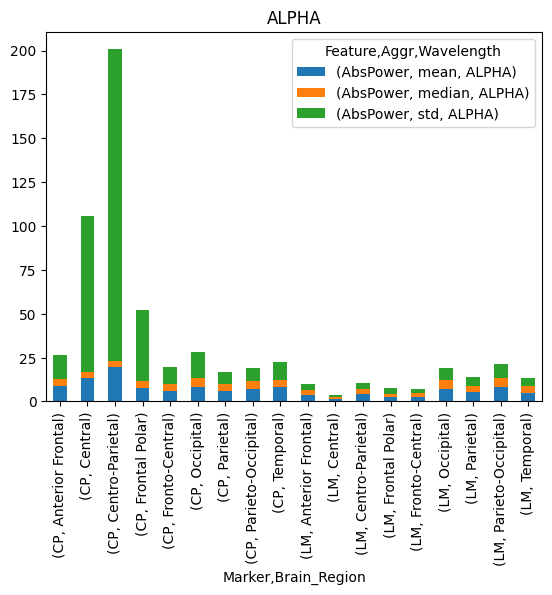

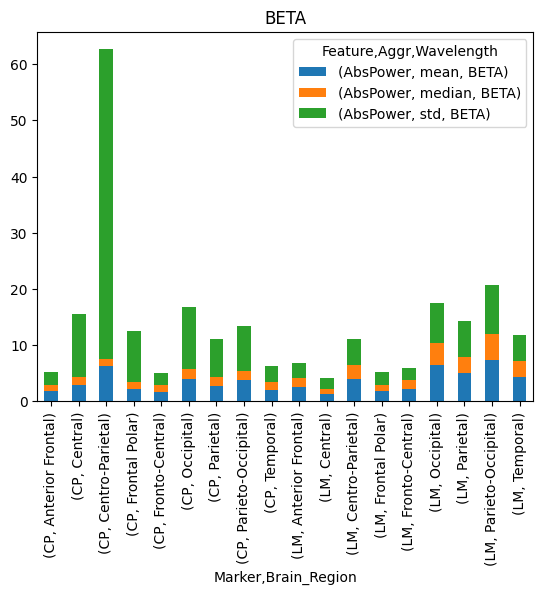

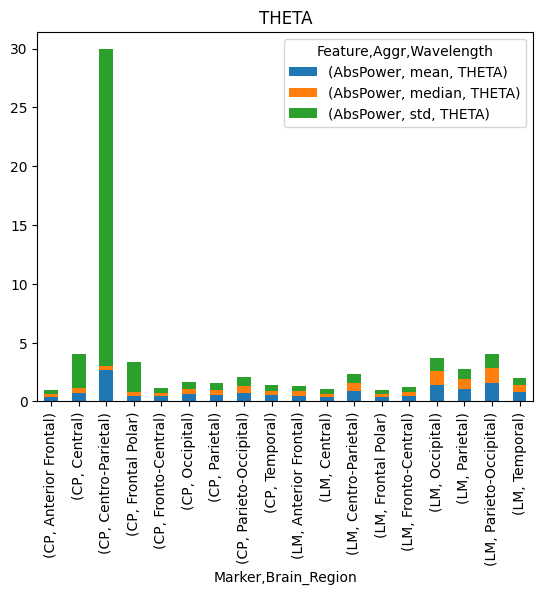

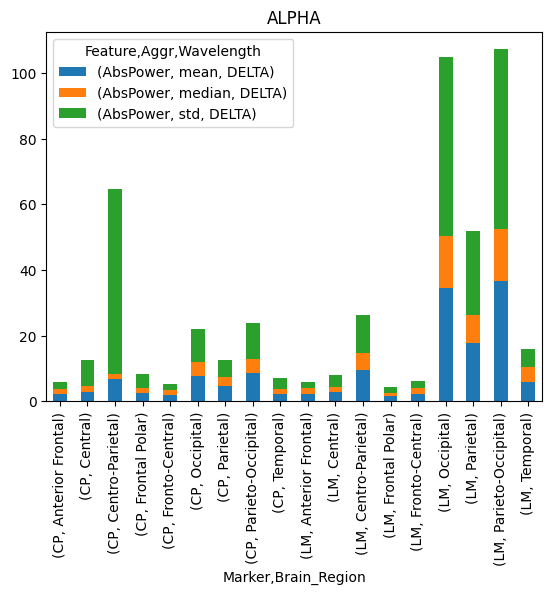

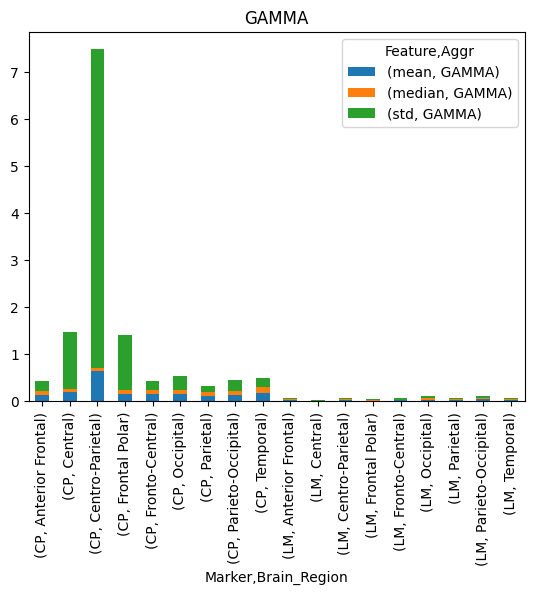

In [ ]:
alpha_pivot.plot.bar(stacked=True, title="ALPHA")
beta_pivot.plot.bar(stacked=True, title="BETA")
theta_pivot.plot.bar(stacked=True, title="THETA")
delta_pivot.plot.bar(stacked=True, title="ALPHA")
gamma_pivot.plot.bar(stacked=True, title="GAMMA")
                    

##### Plot and Save images

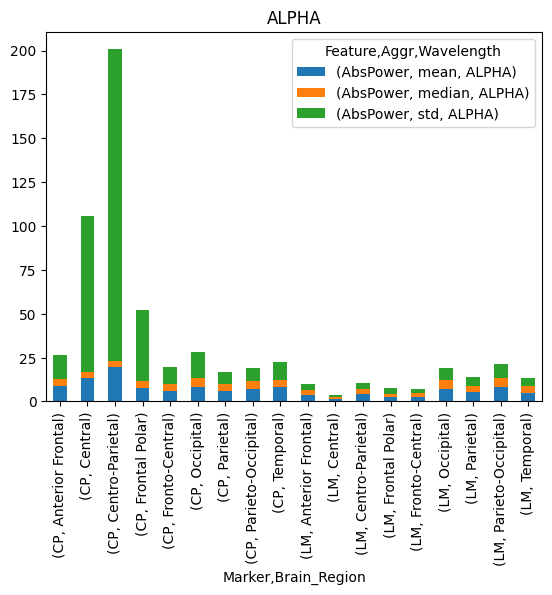

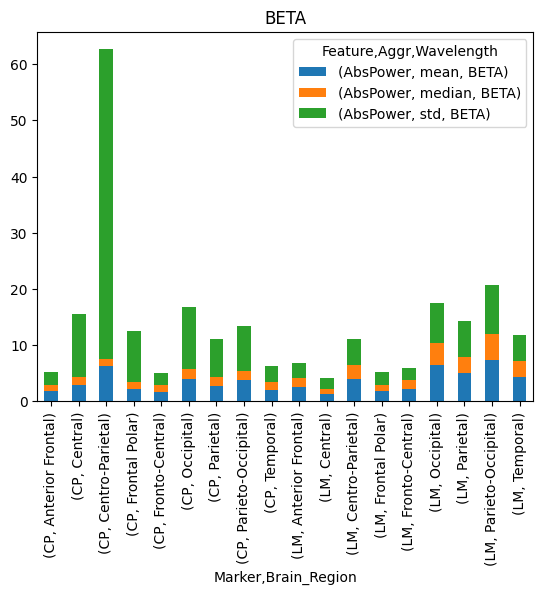

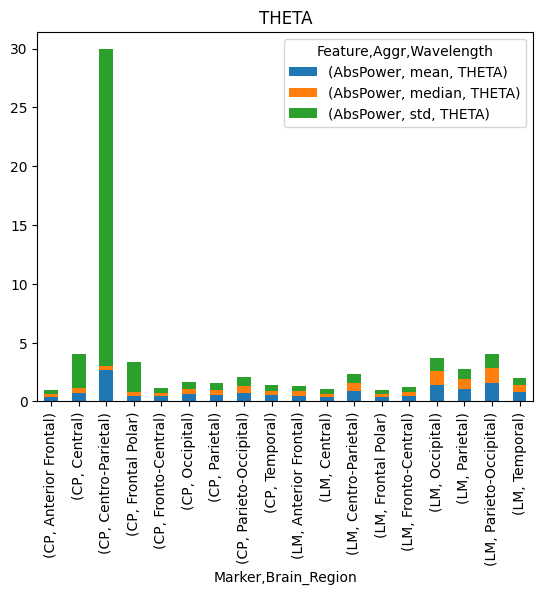

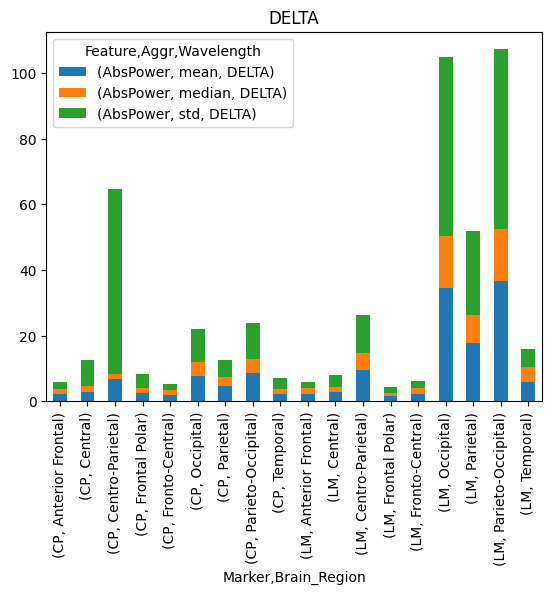

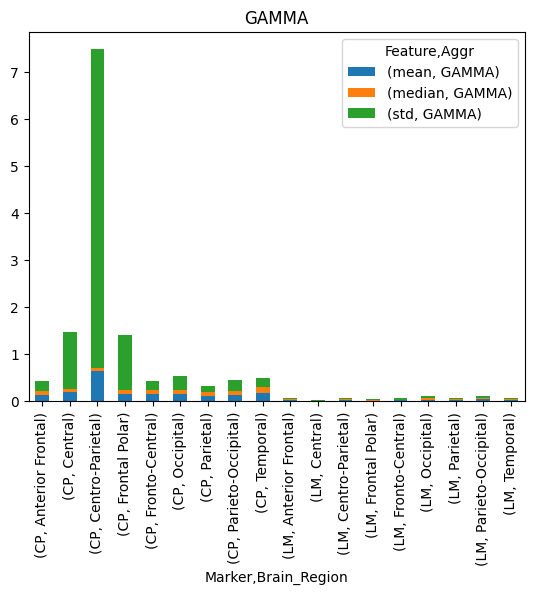

In [ ]:
plot = alpha_pivot.plot.bar(stacked=True, title="ALPHA")
fig = plot.get_figure()
fig.savefig("../../docs/analytics/alpha_abp.png", bbox_inches='tight')

plot = beta_pivot.plot.bar(stacked=True, title="BETA")
fig = plot.get_figure()
fig.savefig("../../docs/analytics/beta_abp.png", bbox_inches='tight')

plot = theta_pivot.plot.bar(stacked=True, title="THETA")
fig = plot.get_figure()
fig.savefig("../../docs/analytics/theta_abp.png", bbox_inches='tight')

plot = delta_pivot.plot.bar(stacked=True, title="DELTA")
fig = plot.get_figure()
fig.savefig("../../docs/analytics/delta_abp.png", bbox_inches='tight')

plot = gamma_pivot.plot.bar(stacked=True, title="GAMMA")
fig = plot.get_figure()
fig.savefig("../../docs/analytics/gamma_abp.png", bbox_inches='tight')

#### Band ABP Variations Per Hemishpere

##### Create Pivots for Alignment (Right, Left & Central)

In [142]:
h1_pivot= cp_lm_df[(cp_lm_df.Alignment == 1)].pivot_table(index=['Marker', 'Brain_Region'],columns=['Wavelength'],values=['AbsPower'], aggfunc={'AbsPower': ["mean"]})
h1_pivot.columns = h1_pivot.columns.rename('Feature', level=0)
h1_pivot.columns = h1_pivot.columns.rename('Aggr', level=1)
h1_pivot

h0_pivot= cp_lm_df[(cp_lm_df.Alignment == 0)].pivot_table(index=['Marker', 'Brain_Region'],columns=['Wavelength'],values=['AbsPower'], aggfunc={'AbsPower': ["mean"]})
h0_pivot.columns = h0_pivot.columns.rename('Feature', level=0)
h0_pivot.columns = h0_pivot.columns.rename('Aggr', level=1)
h0_pivot

h2_pivot= cp_lm_df[(cp_lm_df.Alignment == 2)].pivot_table(index=['Marker', 'Brain_Region'],columns=['Wavelength'],values=['AbsPower'], aggfunc={'AbsPower': ["mean"]})
h2_pivot.columns = h2_pivot.columns.rename('Feature', level=0)
h2_pivot.columns = h2_pivot.columns.rename('Aggr', level=1)
h2_pivot



Feature                    AbsPower                                          
Aggr                           mean                                          
Wavelength                    ALPHA       BETA      DELTA     GAMMA     THETA
Marker Brain_Region                                                          
CP     Anterior Frontal    9.833495   1.919273   2.258430  0.129021  0.372432
       Central            28.929286   5.101281   4.346078  0.431126  1.323477
       Centro-Parietal    34.412553  10.975689  11.631469  1.206805  4.871400
       Frontal Polar       6.705882   1.857536   2.283912  0.143860  0.416108
       Fronto-Central      7.164784   1.991949   2.106224  0.176405  0.463060
       Occipital           6.898436   3.532020   8.468437  0.143089  0.587995
       Parietal            6.364171   3.062980   4.849005  0.119119  0.611596
       Parieto-Occipital   6.843089   3.553055   9.455152  0.146316  0.726257
       Temporal            6.413391   1.830287   1.997751  0.174101  0.475171
LM     Anterior Frontal    3.785059   2.497665   2.228339  0.030369  0.516754
       Central             1.865777   1.782250   3.796973  0.014813  0.521081
       Centro-Parietal     4.309095   4.157828  10.773971  0.023207  0.902487
       Frontal Polar       2.919753   2.067557   1.810698  0.021798  0.413203
       Fronto-Central      2.801138   2.189737   2.444602  0.020926  0.468527
       Occipital           7.401456   6.505015  36.393902  0.043469  1.443375
       Parietal            6.088173   5.614149  21.564929  0.028999  1.153661
       Parieto-Occipital   8.415281   7.392667  40.958800  0.044852  1.634054
       Temporal            5.162380   4.470038   6.484365  0.031571  0.811846

<Axes: title={'center': 'RIGHT'}, xlabel='Marker,Brain_Region'>

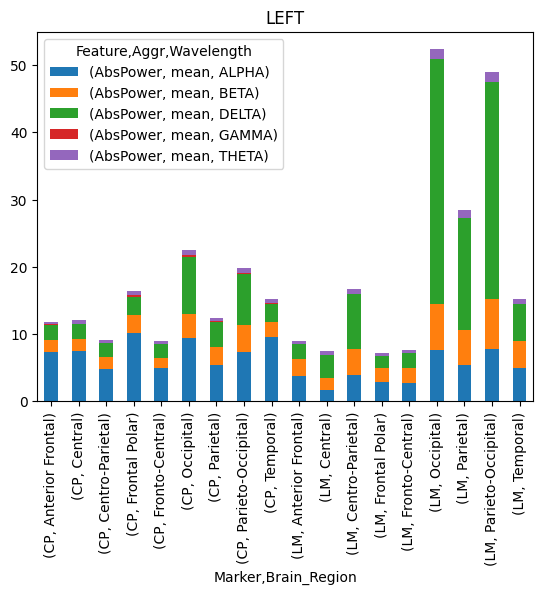

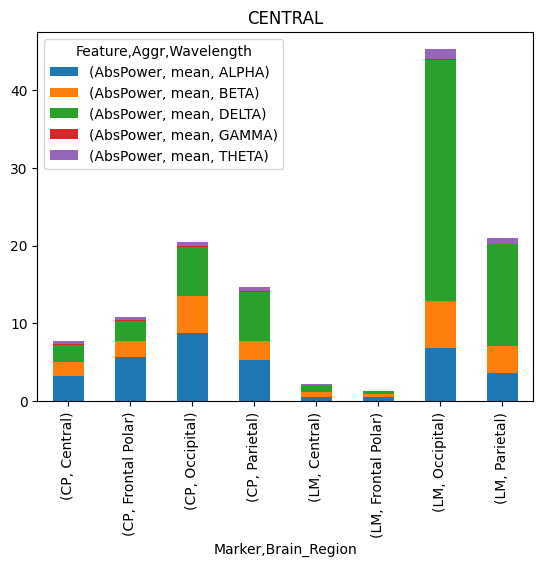

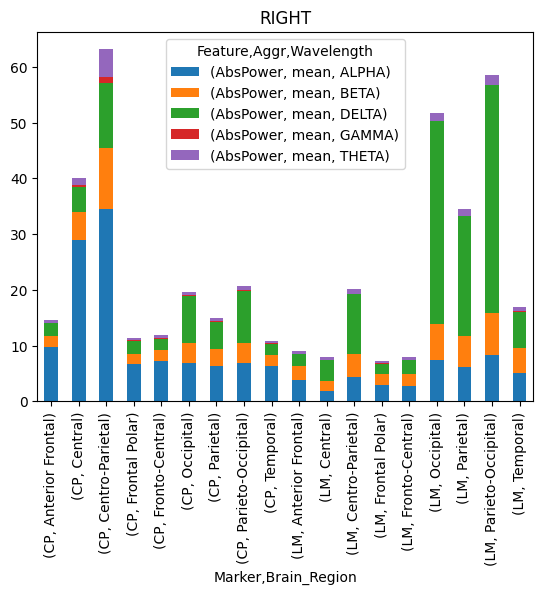

In [143]:
h1_pivot.plot.bar(stacked=True, title="LEFT")
h0_pivot.plot.bar(stacked=True, title="CENTRAL")
h2_pivot.plot.bar(stacked=True, title="RIGHT")

##### Plot and Save images

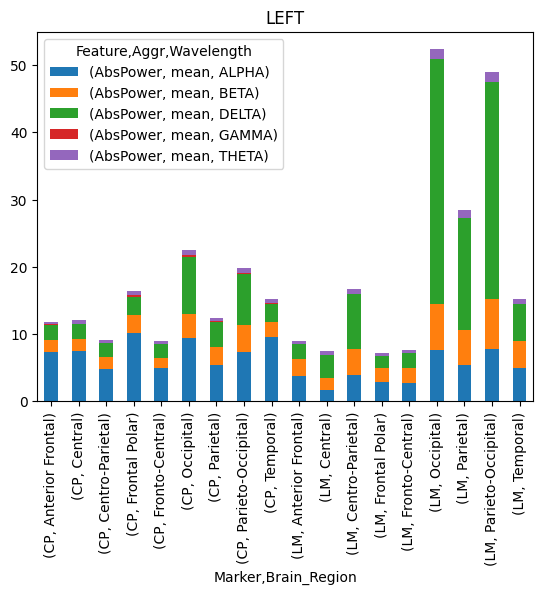

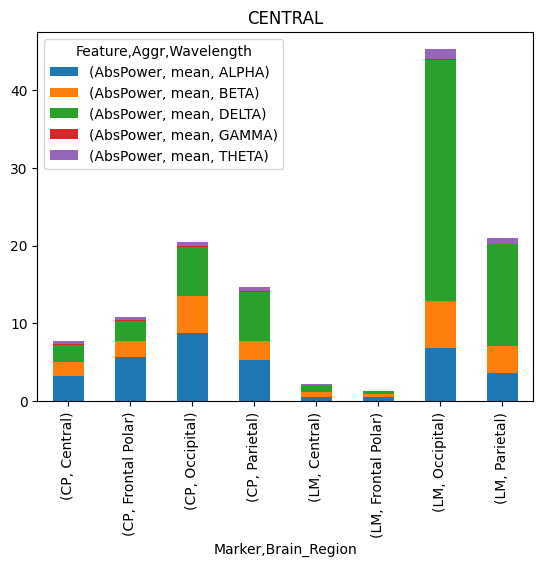

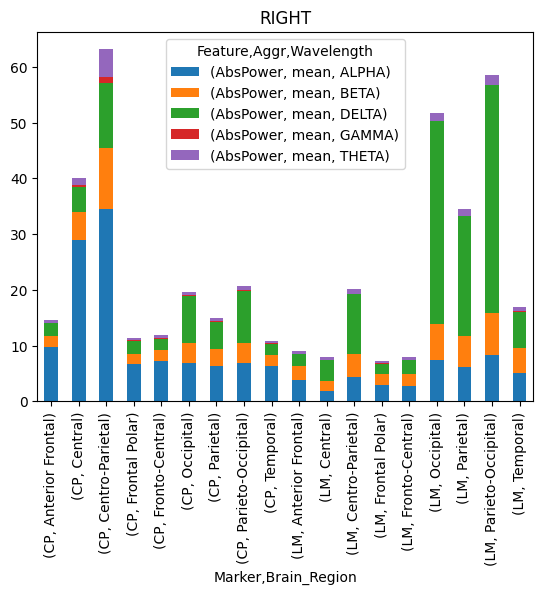

In [144]:
plot = h1_pivot.plot.bar(stacked=True, title="LEFT")
fig = plot.get_figure()
fig.savefig("../../docs/analytics/left_abp.png", bbox_inches='tight')

plot = h0_pivot.plot.bar(stacked=True, title="CENTRAL")
fig = plot.get_figure()
fig.savefig("../../docs/analytics/central_abp.png", bbox_inches='tight')

plot = h2_pivot.plot.bar(stacked=True, title="RIGHT")
fig = plot.get_figure()
fig.savefig("../../docs/analytics/right_abp.png", bbox_inches='tight')